In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1 : DATASET LOADING

In [101]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\movies dataset.csv")

In [128]:
df.head()

,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00


In [129]:
df.tail()

,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.40,447.00,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,21000000.00,13266.00,Roxwell Films,87.00
7660,Aloha Surf Hotel,Unknown,Comedy,2020,"November 5, 2020 (United States)",7.10,14.00,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,21000000.00,20207126.50,Abominable Pictures,90.00
7663,More to Life,Unknown,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,20207126.50,Unknown,90.00
7664,Dream Round,Unknown,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,21000000.00,20207126.50,Cactus Blue Entertainment,90.00
7667,Tee em el,Unknown,Horror,2020,"August 19, 2020 (United States)",5.70,7.00,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,21000000.00,20207126.50,PK 65 Films,102.00


In [104]:
df.shape

(7668, 15)

In [105]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# STEP 2 : DATA CLEANING & PREPROCESSING

In [127]:
df.isnull().sum()

NAME        0
RATING      0
GENRE       0
YEAR        0
RELEASED    0
SCORE       0
VOTES       0
DIRECTOR    0
WRITER      0
STAR        0
COUNTRY     0
BUDGET      0
GROSS       0
COMPANY     0
RUNTIME     0
dtype: int64

In [109]:
df.dropna(subset = ['released','score','votes','writer','star','country','runtime'], inplace = True)

In [110]:
df['rating'] = df['rating'].fillna('Unknown')

In [111]:
df['company'] = df['company'].fillna('Unknown')

In [112]:
df['gross'] = df['gross'].fillna(df['gross'].median())

In [113]:
df['budget'] = df['budget'].fillna(df['budget'].median())

In [114]:
df.duplicated().sum()

0

In [115]:
df.columns = df.columns.str.strip().str.upper()

# STEP 3 : EXPLORATORY DATA ANALYSIS (EDA)

In [116]:
df.describe()

,YEAR,SCORE,VOTES,BUDGET,GROSS,RUNTIME
count,7656.00,7656.00,7656.00,7656.00,7656.00,7656.00
mean,2000.39,6.39,88177.58,31488981.47,77129113.81,107.27
std,11.14,0.97,163401.76,35726990.28,164020419.91,18.57
min,1980.00,1.90,7.00,3000.00,309.00,63.00
25%,1991.00,5.80,9100.00,14000000.00,4681150.75,95.00
50%,2000.00,6.50,33000.00,21000000.00,20207126.50,104.00
75%,2010.00,7.10,93000.00,32000000.00,72693484.50,116.00
max,2020.00,9.30,2400000.00,356000000.00,2847246203.00,366.00


In [117]:
df.shape

(7656, 15)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7656 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      7656 non-null   object 
 1   RATING    7656 non-null   object 
 2   GENRE     7656 non-null   object 
 3   YEAR      7656 non-null   int64  
 4   RELEASED  7656 non-null   object 
 5   SCORE     7656 non-null   float64
 6   VOTES     7656 non-null   float64
 7   DIRECTOR  7656 non-null   object 
 8   WRITER    7656 non-null   object 
 9   STAR      7656 non-null   object 
 10  COUNTRY   7656 non-null   object 
 11  BUDGET    7656 non-null   float64
 12  GROSS     7656 non-null   float64
 13  COMPANY   7656 non-null   object 
 14  RUNTIME   7656 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 957.0+ KB


In [119]:
df['GENRE'].value_counts()

GENRE
Comedy       2244
Action       1703
Drama        1513
Crime         550
Biography     443
Adventure     427
Animation     337
Horror        321
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
Sport           1
Name: count, dtype: int64

In [120]:
df['DIRECTOR'].value_counts()

DIRECTOR
Woody Allen         38
Clint Eastwood      31
Steven Spielberg    27
Directors           27
Ron Howard          24
                    ..
Paolo Taviani        1
Lawrence Dane        1
Bobby Roth           1
Joel Gallen          1
Pereko Mosia         1
Name: count, Length: 2943, dtype: int64

In [133]:
avg_budget = df.groupby('GENRE')['BUDGET'].mean()
avg_budget

GENRE
Action      52075580.19
Adventure   40037611.24
Animation   66356290.80
Biography   24066320.02
Comedy      22081898.94
Crime       22004080.15
Drama       22154515.52
Family      31954545.45
Fantasy     17072727.27
Horror      14334398.75
Music       21000000.00
Musical     21000000.00
Mystery     30245000.05
Romance     22520000.00
Sci-Fi      19987000.00
Sport       21000000.00
Thriller    15100000.00
Western     14000000.00
Name: BUDGET, dtype: float64

In [131]:
Total = df.groupby('GENRE')['BUDGET'].sum()
Total

GENRE
Action      88684713068.00
Adventure   17096060000.00
Animation   22362070000.00
Biography   10661379768.00
Comedy      49551781215.00
Crime       12102244080.00
Drama       33519781987.00
Family        351500000.00
Fantasy       751200000.00
Horror       4601342000.00
Music          21000000.00
Musical        42000000.00
Mystery       604900001.00
Romance       225200000.00
Sci-Fi        199870000.00
Sport          21000000.00
Thriller      241600000.00
Western        42000000.00
Name: BUDGET, dtype: float64

In [132]:
Count = df.groupby('GENRE')['BUDGET'].count()
Count

GENRE
Action       1703
Adventure     427
Animation     337
Biography     443
Comedy       2244
Crime         550
Drama        1513
Family         11
Fantasy        44
Horror        321
Music           1
Musical         2
Mystery        20
Romance        10
Sci-Fi         10
Sport           1
Thriller       16
Western         3
Name: BUDGET, dtype: int64

In [134]:
avg_budget = df.groupby('GENRE')['BUDGET'].mean()

Best_Performing_Genre = avg_budget.sort_values(ascending = False).head()
Best_Performing_Genre

GENRE
Animation   66356290.80
Action      52075580.19
Adventure   40037611.24
Family      31954545.45
Mystery     30245000.05
Name: BUDGET, dtype: float64

In [135]:
Worst_Performing_Genre = avg_budget.sort_values().head()
Worst_Performing_Genre

GENRE
Western    14000000.00
Horror     14334398.75
Thriller   15100000.00
Fantasy    17072727.27
Sci-Fi     19987000.00
Name: BUDGET, dtype: float64

In [137]:
df.corr(numeric_only = True)

,YEAR,SCORE,VOTES,BUDGET,GROSS,RUNTIME
YEAR,1.00,0.10,0.22,0.29,0.26,0.12
SCORE,0.10,1.00,0.41,0.06,0.19,0.40
VOTES,0.22,0.41,1.00,0.46,0.63,0.31
BUDGET,0.29,0.06,0.46,1.00,0.75,0.27
GROSS,0.26,0.19,0.63,0.75,1.00,0.24
RUNTIME,0.12,0.40,0.31,0.27,0.24,1.00


# STEP 4 : DATA VISUALIZATION

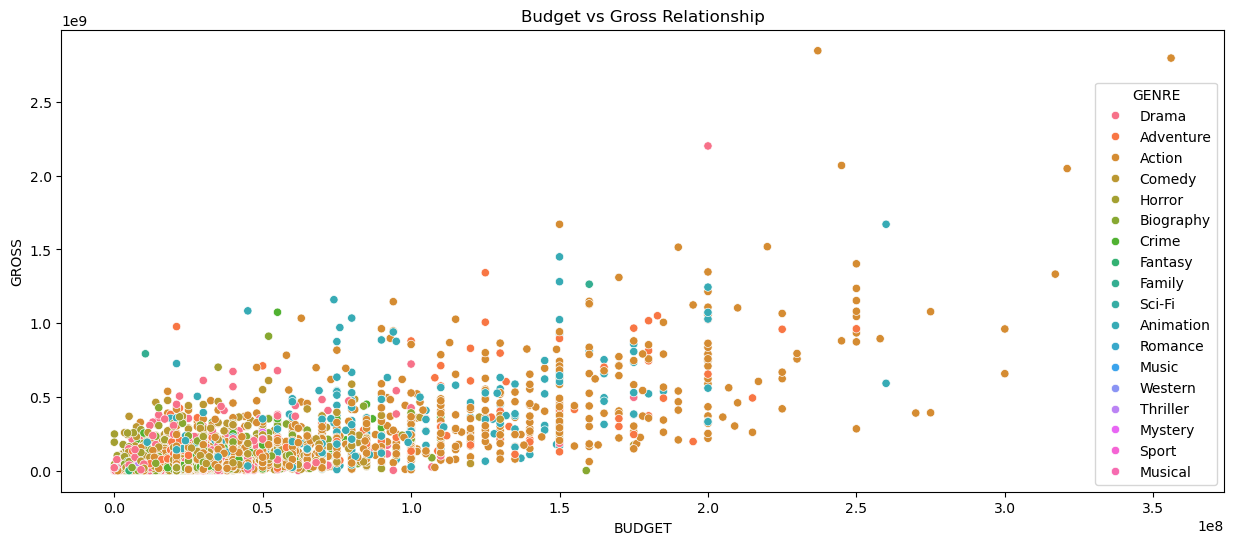

In [203]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x = 'BUDGET', y = 'GROSS', hue = 'GENRE', data = df)
plt.title('Budget vs Gross Relationship')
plt.show()

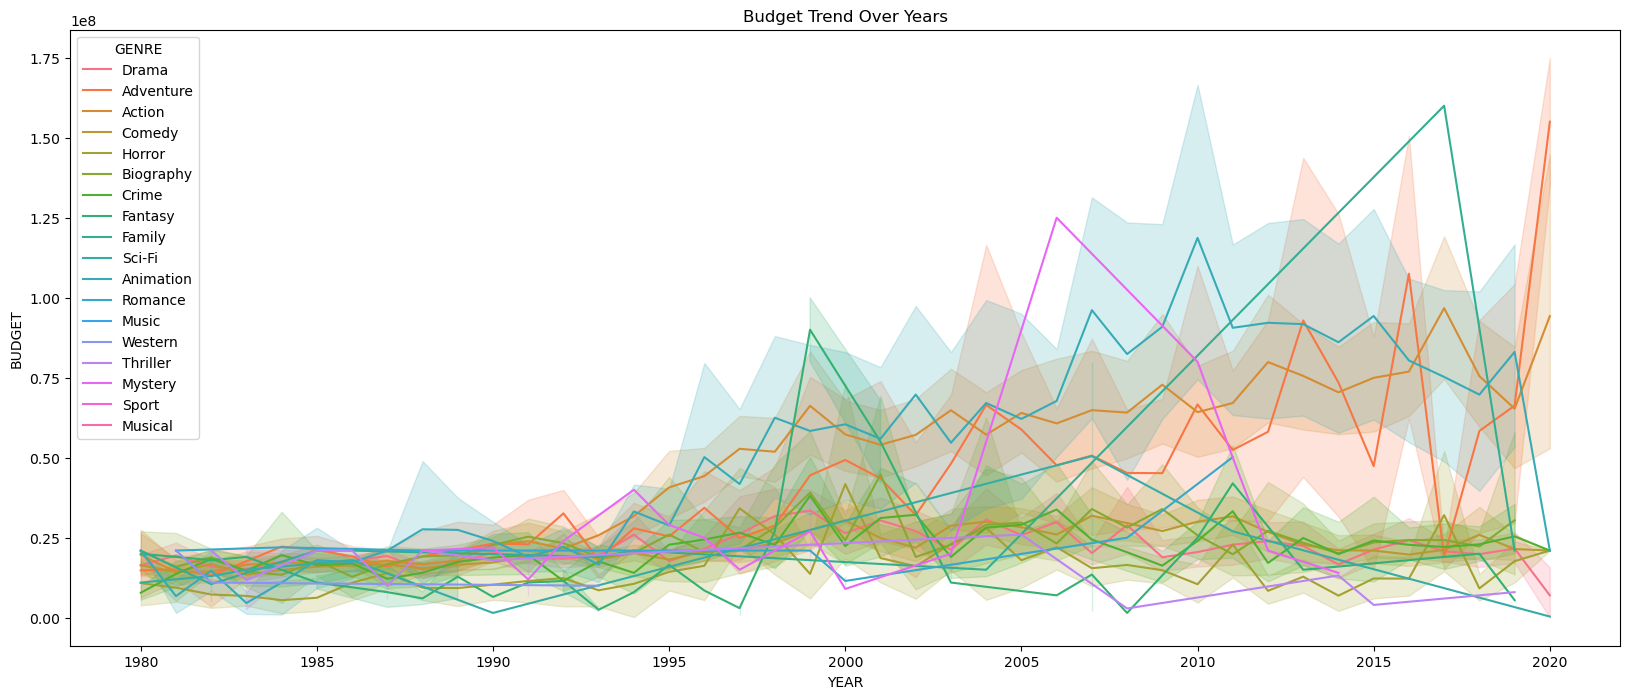

In [207]:
plt.figure(figsize=(20, 8))
sns.lineplot(x = 'YEAR', y = 'BUDGET', hue = 'GENRE', data = df)
plt.title('Budget Trend Over Years')
plt.show()

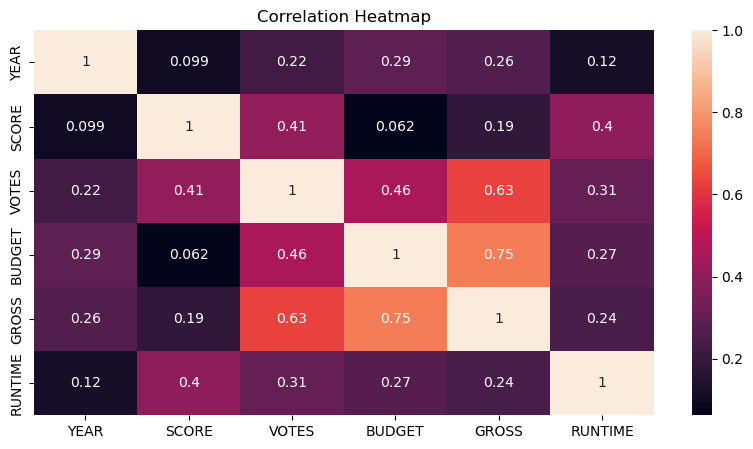

In [205]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.title('Correlation Heatmap')
plt.show()

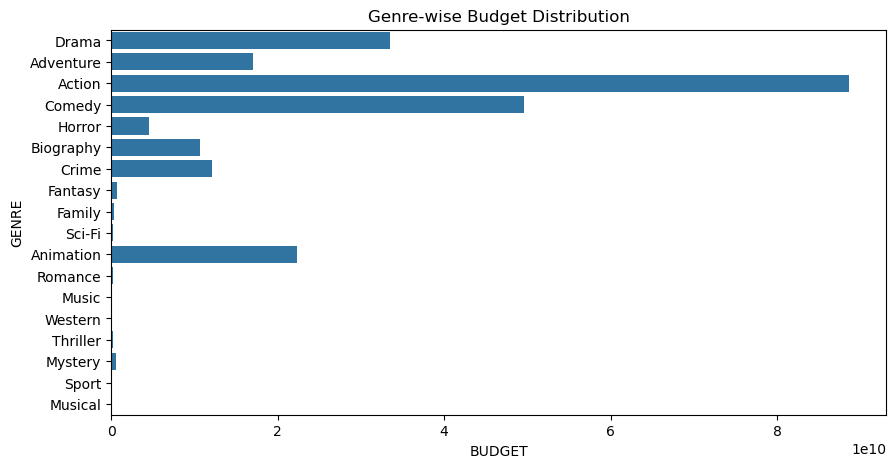

In [206]:
plt.figure(figsize=(10, 5))
sns.barplot(y = 'GENRE', x = 'BUDGET', data = df, estimator = sum, errorbar=None)
plt.title('Genre-wise Budget Distribution')
plt.show()

# STEP 5 : INSIGHTS AND INTERPRETATION